<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"


The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
!pip install html5lib
import html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.2 MB/s eta 0:00:00


Download the webpage at the url


In [5]:
html=requests.get(url).text


Create a soup object


In [8]:
soup=BeautifulSoup(html,"html.parser")
soup
tables=soup.find_all('table')
len(tables)
tables

[<table>
 <tbody>
 <tr>
 <td>No.</td>
 <td>Language</td>
 <td>Created By</td>
 <td>Average Annual Salary</td>
 <td>Learning Difficulty</td>
 </tr>
 <tr>
 <td>1</td>
 <td>Python</td>
 <td>Guido van Rossum</td>
 <td>$114,383</td>
 <td>Easy</td>
 </tr>
 <tr>
 <td>2</td>
 <td>Java</td>
 <td>James Gosling</td>
 <td>$101,013</td>
 <td>Easy</td>
 </tr>
 <tr>
 <td>3</td>
 <td>R</td>
 <td>Robert Gentleman, Ross Ihaka</td>
 <td>$92,037</td>
 <td>Hard</td>
 </tr>
 <tr>
 <td>4</td>
 <td>Javascript</td>
 <td>Netscape</td>
 <td>$110,981</td>
 <td>Easy</td>
 </tr>
 <tr>
 <td>5</td>
 <td>Swift</td>
 <td>Apple</td>
 <td>$130,801</td>
 <td>Easy</td>
 </tr>
 <tr>
 <td>6</td>
 <td>C++</td>
 <td>Bjarne Stroustrup</td>
 <td>$113,865</td>
 <td>Hard</td>
 </tr>
 <tr>
 <td>7</td>
 <td>C#</td>
 <td>Microsoft</td>
 <td>$88,726</td>
 <td>Hard</td>
 </tr>
 <tr>
 <td>8</td>
 <td>PHP</td>
 <td>Rasmus Lerdorf</td>
 <td>$84,727</td>
 <td>Easy</td>
 </tr>
 <tr>
 <td>9</td>
 <td>SQL</td>
 <td>Donald D. Chamberlin, Raymo

Scrape the `Language name` and `annual average salary`.


In [9]:
data=pd.DataFrame(columns=['Language Name','Average Annual Salary'])
for row in tables[0].tbody.find_all("tr"):
    col=row.find_all('td')
    if col != []:
        lang=col[1].text
        sal=col[3].text
        data=data.append({'Language Name': lang,
                         'Average Annual Salary':sal},ignore_index=True)

data=data.drop(labels=0,axis=0)
data=data.set_index('Language Name')
data=data.sort_values(by=['Average Annual Salary'],ascending=False)




data['Average Annual Salary']=data['Average Annual Salary'].str.replace('$','').str.replace(',','')
data['Average Annual Salary']=data['Average Annual Salary'].astype('int')
data=data.sort_values(by=['Average Annual Salary'],ascending=False)

data

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


,Average Annual Salary
Language Name,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013
Go,94082
R,92037
C#,88726
SQL,84793


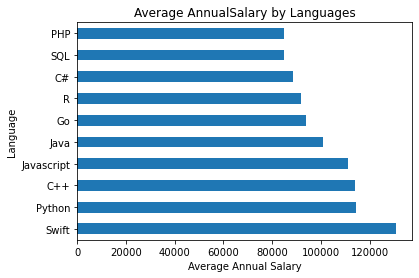

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(kind='barh',legend=False)
plt.title('Average AnnualSalary by Languages')
plt.ylabel('Language')
plt.xlabel('Average Annual Salary')
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


In [11]:
data.to_csv('popular-languages.csv',index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
